In [1]:
%load_ext autoreload
%autoreload 2
import copy
import torch
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyro
from pyro.infer import SVI, Trace_ELBO
from pyro import poutine, infer, nn, optim, distributions as dist
from pyro.poutine.trace_messenger import TraceMessenger

plt.style.use('seaborn-v0_8')

/env_nlp/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
prob = dist.Normal(5, 2.)
x= prob.sample((100,) )
x

tensor([ 5.3606,  2.3661,  4.7863,  5.4606,  4.7806,  3.8014,  5.5489,  5.8429,
         7.5138,  5.5811,  6.4055,  3.6548,  1.9198,  6.3644,  8.0814,  6.3635,
         4.8303,  3.2084,  5.4008,  7.1685,  5.4893,  8.6178,  3.7076,  5.0261,
         6.4316,  5.5290,  6.1749,  4.7627,  5.8928,  5.2005,  3.5786,  4.9301,
         4.6039,  7.9003,  2.5057,  1.2011,  4.1518,  3.6229,  4.6803,  3.2775,
         4.2312,  1.4442,  2.3728,  5.5425,  4.3146,  8.0107,  7.9259,  5.5699,
         8.9080,  2.4924,  2.5632,  5.7260,  8.0061,  0.7024,  6.3908,  0.7407,
         7.2961,  5.8747,  1.9360, 10.2399,  5.8433, 10.1749,  5.2477,  7.6781,
         4.5014, 11.2925,  2.9754,  3.5654,  3.9475,  8.0504,  5.0690,  1.8635,
         3.6430,  4.8083,  5.5781,  2.5915,  3.9283,  4.0140,  7.5996,  5.3543,
         4.7134,  5.4960,  5.9979,  1.5145,  5.5162,  7.3524,  6.1284,  2.9477,
        -0.2151,  5.4171, -0.0260,  2.6171,  5.0064,  3.5786,  9.7551,  3.1514,
         0.4548,  4.9382,  6.3573,  4.21

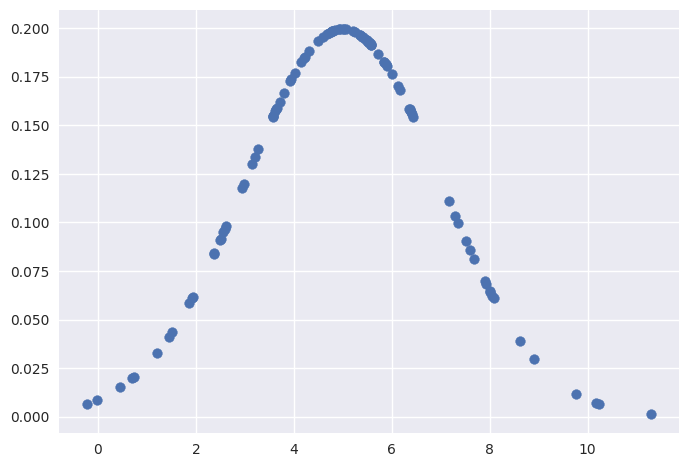

In [3]:
plt.scatter(x, prob.log_prob(x).exp())

In [4]:
N = len(x)
N

100

In [5]:
def model(x):
    p = pyro.param("p", lambda: torch.randn(1))
    mu = pyro.sample("mu", dist.Normal(p, torch.tensor(1.5)))
    with pyro.plate("data", N):
        obs = pyro.sample("obs", dist.Normal(mu, torch.tensor(3.)), obs=x)
    
    return obs

In [6]:
trace = pyro.poutine.trace(model).get_trace(x)

In [7]:
trace

In [8]:
trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (tensor([ 5.3606,  2.3661,  4.7863,  5.4606,  4.7806,  3.8014,  5.5489,  5.8429,
                         7.5138,  5.5811,  6.4055,  3.6548,  1.9198,  6.3644,  8.0814,  6.3635,
                         4.8303,  3.2084,  5.4008,  7.1685,  5.4893,  8.6178,  3.7076,  5.0261,
                         6.4316,  5.5290,  6.1749,  4.7627,  5.8928,  5.2005,  3.5786,  4.9301,
                         4.6039,  7.9003,  2.5057,  1.2011,  4.1518,  3.6229,  4.6803,  3.2775,
                         4.2312,  1.4442,  2.3728,  5.5425,  4.3146,  8.0107,  7.9259,  5.5699,
                         8.9080,  2.4924,  2.5632,  5.7260,  8.0061,  0.7024,  6.3908,  0.7407,
                         7.2961,  5.8747,  1.9360, 10.2399,  5.8433, 10.1749,  5.2477,  7.6781,
                         4.5014, 11.2925,  2.9754,  3.5654,  3.9475,  8.0504,  5.0690,  1.8635,
                         3.6430,  4.8083

In [9]:
trace.compute_log_prob()

In [10]:
trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (tensor([ 5.3606,  2.3661,  4.7863,  5.4606,  4.7806,  3.8014,  5.5489,  5.8429,
                         7.5138,  5.5811,  6.4055,  3.6548,  1.9198,  6.3644,  8.0814,  6.3635,
                         4.8303,  3.2084,  5.4008,  7.1685,  5.4893,  8.6178,  3.7076,  5.0261,
                         6.4316,  5.5290,  6.1749,  4.7627,  5.8928,  5.2005,  3.5786,  4.9301,
                         4.6039,  7.9003,  2.5057,  1.2011,  4.1518,  3.6229,  4.6803,  3.2775,
                         4.2312,  1.4442,  2.3728,  5.5425,  4.3146,  8.0107,  7.9259,  5.5699,
                         8.9080,  2.4924,  2.5632,  5.7260,  8.0061,  0.7024,  6.3908,  0.7407,
                         7.2961,  5.8747,  1.9360, 10.2399,  5.8433, 10.1749,  5.2477,  7.6781,
                         4.5014, 11.2925,  2.9754,  3.5654,  3.9475,  8.0504,  5.0690,  1.8635,
                         3.6430,  4.8083

In [11]:
for site in trace.iter_stochastic_nodes():
    print(site)

('mu', {'type': 'sample', 'name': 'mu', 'fn': Normal(loc: tensor([-0.2607], requires_grad=True), scale: tensor([1.5000])), 'is_observed': False, 'args': (), 'kwargs': {}, 'value': tensor([-1.3680], grad_fn=<AddBackward0>), 'infer': {}, 'scale': 1.0, 'mask': None, 'cond_indep_stack': (), 'done': True, 'stop': False, 'continuation': None, 'unscaled_log_prob': tensor([-1.5969], grad_fn=<SubBackward0>), 'log_prob': tensor([-1.5969], grad_fn=<SubBackward0>), 'log_prob_sum': tensor(-1.5969, grad_fn=<SumBackward0>)})
('data', {'type': 'sample', 'name': 'data', 'fn': <pyro.poutine.subsample_messenger._Subsample object at 0x7ff586275d60>, 'is_observed': False, 'args': (), 'kwargs': {}, 'value': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6

In [12]:
for param_node in trace.param_nodes:
    print(param_node)

p


In [13]:
for name in trace.stochastic_nodes:
    print(name)

mu
data


In [14]:
for name in trace.observation_nodes:
    print(name)

obs


In [15]:
scaled_model = poutine.scale(model, torch.tensor(0.5))
scaled_trace = poutine.trace(scaled_model).get_trace(x)

In [17]:
scaled_trace.compute_log_prob()

In [18]:
scaled_trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (tensor([ 5.3606,  2.3661,  4.7863,  5.4606,  4.7806,  3.8014,  5.5489,  5.8429,
                         7.5138,  5.5811,  6.4055,  3.6548,  1.9198,  6.3644,  8.0814,  6.3635,
                         4.8303,  3.2084,  5.4008,  7.1685,  5.4893,  8.6178,  3.7076,  5.0261,
                         6.4316,  5.5290,  6.1749,  4.7627,  5.8928,  5.2005,  3.5786,  4.9301,
                         4.6039,  7.9003,  2.5057,  1.2011,  4.1518,  3.6229,  4.6803,  3.2775,
                         4.2312,  1.4442,  2.3728,  5.5425,  4.3146,  8.0107,  7.9259,  5.5699,
                         8.9080,  2.4924,  2.5632,  5.7260,  8.0061,  0.7024,  6.3908,  0.7407,
                         7.2961,  5.8747,  1.9360, 10.2399,  5.8433, 10.1749,  5.2477,  7.6781,
                         4.5014, 11.2925,  2.9754,  3.5654,  3.9475,  8.0504,  5.0690,  1.8635,
                         3.6430,  4.8083

In [19]:
scaled_trace.log_prob_sum()

tensor(-193.0158, grad_fn=<AddBackward0>)

In [21]:
scaled_trace.nodes["obs"][ 'unscaled_log_prob'] * 0.5 == scaled_trace.nodes["obs"]['log_prob']

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True])

In [22]:
def model(x):
    p = pyro.param("p", lambda: torch.randn(1))
    mu = pyro.sample("mu", dist.Normal(p, torch.tensor(1.5)))
    with pyro.plate("data", N):
        obs = pyro.sample("obs", dist.Normal(mu, torch.tensor(3.)), obs=x)
    
    return obs

In [23]:
trace = poutine.trace(model, param_only=True).get_trace(x)

In [24]:
trace.nodes

OrderedDict([('p',
              {'type': 'param',
               'name': 'p',
               'fn': <bound method ParamStoreDict.get_param of <pyro.params.param_store.ParamStoreDict object at 0x7ff58caefb80>>,
               'is_observed': False,
               'args': ('p', <function __main__.model.<locals>.<lambda>()>),
               'kwargs': {'constraint': Real(), 'event_dim': None},
               'value': tensor([-0.2607], requires_grad=True),
               'scale': 1.0,
               'mask': None,
               'cond_indep_stack': (),
               'done': True,
               'stop': False,
               'continuation': None,
               'infer': {}})])

In [25]:
def model(x):
    p = pyro.param("p", lambda: torch.randn(1))
    mu = pyro.sample("mu", dist.Normal(p, torch.tensor(1.5)))
    
    s = pyro.sample("s", dist.Uniform(0., mu.abs()) )  
  
    with pyro.plate("data", N):
        obs = pyro.sample("obs", dist.Normal(mu, s), obs=x)
    
    return obs

In [28]:
trace = poutine.trace(model).get_trace(x)

In [29]:
trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (tensor([ 5.3606,  2.3661,  4.7863,  5.4606,  4.7806,  3.8014,  5.5489,  5.8429,
                         7.5138,  5.5811,  6.4055,  3.6548,  1.9198,  6.3644,  8.0814,  6.3635,
                         4.8303,  3.2084,  5.4008,  7.1685,  5.4893,  8.6178,  3.7076,  5.0261,
                         6.4316,  5.5290,  6.1749,  4.7627,  5.8928,  5.2005,  3.5786,  4.9301,
                         4.6039,  7.9003,  2.5057,  1.2011,  4.1518,  3.6229,  4.6803,  3.2775,
                         4.2312,  1.4442,  2.3728,  5.5425,  4.3146,  8.0107,  7.9259,  5.5699,
                         8.9080,  2.4924,  2.5632,  5.7260,  8.0061,  0.7024,  6.3908,  0.7407,
                         7.2961,  5.8747,  1.9360, 10.2399,  5.8433, 10.1749,  5.2477,  7.6781,
                         4.5014, 11.2925,  2.9754,  3.5654,  3.9475,  8.0504,  5.0690,  1.8635,
                         3.6430,  4.8083

In [30]:
trace.compute_log_prob()

In [32]:
trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (tensor([ 5.3606,  2.3661,  4.7863,  5.4606,  4.7806,  3.8014,  5.5489,  5.8429,
                         7.5138,  5.5811,  6.4055,  3.6548,  1.9198,  6.3644,  8.0814,  6.3635,
                         4.8303,  3.2084,  5.4008,  7.1685,  5.4893,  8.6178,  3.7076,  5.0261,
                         6.4316,  5.5290,  6.1749,  4.7627,  5.8928,  5.2005,  3.5786,  4.9301,
                         4.6039,  7.9003,  2.5057,  1.2011,  4.1518,  3.6229,  4.6803,  3.2775,
                         4.2312,  1.4442,  2.3728,  5.5425,  4.3146,  8.0107,  7.9259,  5.5699,
                         8.9080,  2.4924,  2.5632,  5.7260,  8.0061,  0.7024,  6.3908,  0.7407,
                         7.2961,  5.8747,  1.9360, 10.2399,  5.8433, 10.1749,  5.2477,  7.6781,
                         4.5014, 11.2925,  2.9754,  3.5654,  3.9475,  8.0504,  5.0690,  1.8635,
                         3.6430,  4.8083

In [37]:
blocked_model = poutine.block(model, hide_fn=lambda msg: True)
blocked_trace = poutine.trace(blocked_model).get_trace(x)
blocked_trace

In [38]:
blocked_trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (tensor([ 5.3606,  2.3661,  4.7863,  5.4606,  4.7806,  3.8014,  5.5489,  5.8429,
                         7.5138,  5.5811,  6.4055,  3.6548,  1.9198,  6.3644,  8.0814,  6.3635,
                         4.8303,  3.2084,  5.4008,  7.1685,  5.4893,  8.6178,  3.7076,  5.0261,
                         6.4316,  5.5290,  6.1749,  4.7627,  5.8928,  5.2005,  3.5786,  4.9301,
                         4.6039,  7.9003,  2.5057,  1.2011,  4.1518,  3.6229,  4.6803,  3.2775,
                         4.2312,  1.4442,  2.3728,  5.5425,  4.3146,  8.0107,  7.9259,  5.5699,
                         8.9080,  2.4924,  2.5632,  5.7260,  8.0061,  0.7024,  6.3908,  0.7407,
                         7.2961,  5.8747,  1.9360, 10.2399,  5.8433, 10.1749,  5.2477,  7.6781,
                         4.5014, 11.2925,  2.9754,  3.5654,  3.9475,  8.0504,  5.0690,  1.8635,
                         3.6430,  4.8083

In [58]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
blocked_model = poutine.block(model, hide=["p", "mu"])
blocked_trace = poutine.trace(blocked_model).get_trace(x)
blocked_trace.compute_log_prob()
blocked_trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (tensor([ 5.3606,  2.3661,  4.7863,  5.4606,  4.7806,  3.8014,  5.5489,  5.8429,
                         7.5138,  5.5811,  6.4055,  3.6548,  1.9198,  6.3644,  8.0814,  6.3635,
                         4.8303,  3.2084,  5.4008,  7.1685,  5.4893,  8.6178,  3.7076,  5.0261,
                         6.4316,  5.5290,  6.1749,  4.7627,  5.8928,  5.2005,  3.5786,  4.9301,
                         4.6039,  7.9003,  2.5057,  1.2011,  4.1518,  3.6229,  4.6803,  3.2775,
                         4.2312,  1.4442,  2.3728,  5.5425,  4.3146,  8.0107,  7.9259,  5.5699,
                         8.9080,  2.4924,  2.5632,  5.7260,  8.0061,  0.7024,  6.3908,  0.7407,
                         7.2961,  5.8747,  1.9360, 10.2399,  5.8433, 10.1749,  5.2477,  7.6781,
                         4.5014, 11.2925,  2.9754,  3.5654,  3.9475,  8.0504,  5.0690,  1.8635,
                         3.6430,  4.8083

In [59]:
blocked_trace.log_prob_sum()

tensor(-8696.5137, grad_fn=<AddBackward0>)

In [56]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
blocked_model = poutine.block(model, hide=["p", "mu", "obs"])
blocked_trace = poutine.trace(blocked_model).get_trace(x)
blocked_trace.compute_log_prob()
blocked_trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (tensor([ 5.3606,  2.3661,  4.7863,  5.4606,  4.7806,  3.8014,  5.5489,  5.8429,
                         7.5138,  5.5811,  6.4055,  3.6548,  1.9198,  6.3644,  8.0814,  6.3635,
                         4.8303,  3.2084,  5.4008,  7.1685,  5.4893,  8.6178,  3.7076,  5.0261,
                         6.4316,  5.5290,  6.1749,  4.7627,  5.8928,  5.2005,  3.5786,  4.9301,
                         4.6039,  7.9003,  2.5057,  1.2011,  4.1518,  3.6229,  4.6803,  3.2775,
                         4.2312,  1.4442,  2.3728,  5.5425,  4.3146,  8.0107,  7.9259,  5.5699,
                         8.9080,  2.4924,  2.5632,  5.7260,  8.0061,  0.7024,  6.3908,  0.7407,
                         7.2961,  5.8747,  1.9360, 10.2399,  5.8433, 10.1749,  5.2477,  7.6781,
                         4.5014, 11.2925,  2.9754,  3.5654,  3.9475,  8.0504,  5.0690,  1.8635,
                         3.6430,  4.8083

In [57]:
blocked_trace.log_prob_sum()

tensor(-0.0961, grad_fn=<AddBackward0>)

In [60]:
-8696.4180 -0.0961

-8696.5141

In [61]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
blocked_model = poutine.block(model, hide_fn=lambda msg: msg["type"] == "sample")
blocked_trace = poutine.trace(blocked_model).get_trace(x)
blocked_trace.compute_log_prob()
blocked_trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (tensor([ 5.3606,  2.3661,  4.7863,  5.4606,  4.7806,  3.8014,  5.5489,  5.8429,
                         7.5138,  5.5811,  6.4055,  3.6548,  1.9198,  6.3644,  8.0814,  6.3635,
                         4.8303,  3.2084,  5.4008,  7.1685,  5.4893,  8.6178,  3.7076,  5.0261,
                         6.4316,  5.5290,  6.1749,  4.7627,  5.8928,  5.2005,  3.5786,  4.9301,
                         4.6039,  7.9003,  2.5057,  1.2011,  4.1518,  3.6229,  4.6803,  3.2775,
                         4.2312,  1.4442,  2.3728,  5.5425,  4.3146,  8.0107,  7.9259,  5.5699,
                         8.9080,  2.4924,  2.5632,  5.7260,  8.0061,  0.7024,  6.3908,  0.7407,
                         7.2961,  5.8747,  1.9360, 10.2399,  5.8433, 10.1749,  5.2477,  7.6781,
                         4.5014, 11.2925,  2.9754,  3.5654,  3.9475,  8.0504,  5.0690,  1.8635,
                         3.6430,  4.8083

In [62]:
blocked_trace.log_prob_sum()

0.0

In [84]:
def model():
    n, d = 100, 50
    x = torch.randn(n, d)
    y = torch.randn(n)
    p = pyro.param("p", torch.randn((d, )))
    
    s = pyro.sample("s", dist.LogNormal(0, 10.))

    with pyro.plate("data", n):
        mu = pyro.sample("mu", dist.Normal(x @ p, torch.tensor(1.)))
        obs = pyro.sample("obs", dist.Normal(mu, s), obs=y)
    
    return obs

In [87]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
trace = poutine.trace(model).get_trace()
trace.compute_log_prob()

In [88]:
trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT', 'type': 'args', 'args': (), 'kwargs': {}}),
             ('p',
              {'type': 'param',
               'name': 'p',
               'fn': <bound method ParamStoreDict.get_param of <pyro.params.param_store.ParamStoreDict object at 0x7ff58caefb80>>,
               'is_observed': False,
               'args': ('p',
                tensor([-1.0768, -0.2064,  1.6145, -0.7608, -0.2477,  0.8676,  0.3162,  1.4760,
                         2.1844, -1.0102, -0.8100, -0.5154, -2.0127,  1.1668, -2.3918,  0.2562,
                        -1.1708, -1.0753, -0.3450, -0.0816, -1.1515, -1.8388, -2.2352, -0.7290,
                        -2.0795,  1.1382,  1.1847, -0.2417, -2.2050,  0.1879, -1.2202, -1.3615,
                        -0.0945,  0.2903,  1.5134,  1.2463,  1.2842,  0.6412, -1.0515,  1.0107,
                        -0.9904, -2.4436,  1.4533, -0.2001, -1.1807,  0.4489, -1.3836,  0.6680,
                        -1.6093, -1.2903], requ

In [89]:
trace.log_prob_sum()

tensor(-1145.4777, grad_fn=<AddBackward0>)

In [102]:
dist.Normal(0., 1.).mask(False)

MaskedDistribution()

In [112]:
gmask = None
def model(is_masked=False):
    global gmask
    n, d = 100, 50
    x = torch.randn(n, d)
    y = torch.randn(n)
    p = pyro.param("p", torch.randn((d, )))
    
    s = pyro.sample("s", dist.LogNormal(0, 10.))
    mask_prob = torch.empty(100, ).uniform_(0, 1.)
    mask = torch.bernoulli(mask_prob).bool()
    if not is_masked:
        mask.fill_(True)
    gmask = mask
    with pyro.plate("data", n):
        mu = pyro.sample("mu", dist.Normal(x @ p, torch.tensor(1.)))
        obs = pyro.sample("obs", dist.Normal(mu, s).mask(mask), obs=y)
    
    return obs

In [113]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
trace = poutine.trace(model).get_trace()
trace.compute_log_prob()

In [114]:
trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT', 'type': 'args', 'args': (), 'kwargs': {}}),
             ('p',
              {'type': 'param',
               'name': 'p',
               'fn': <bound method ParamStoreDict.get_param of <pyro.params.param_store.ParamStoreDict object at 0x7ff58caefb80>>,
               'is_observed': False,
               'args': ('p',
                tensor([-1.0768, -0.2064,  1.6145, -0.7608, -0.2477,  0.8676,  0.3162,  1.4760,
                         2.1844, -1.0102, -0.8100, -0.5154, -2.0127,  1.1668, -2.3918,  0.2562,
                        -1.1708, -1.0753, -0.3450, -0.0816, -1.1515, -1.8388, -2.2352, -0.7290,
                        -2.0795,  1.1382,  1.1847, -0.2417, -2.2050,  0.1879, -1.2202, -1.3615,
                        -0.0945,  0.2903,  1.5134,  1.2463,  1.2842,  0.6412, -1.0515,  1.0107,
                        -0.9904, -2.4436,  1.4533, -0.2001, -1.1807,  0.4489, -1.3836,  0.6680,
                        -1.6093, -1.2903], requ

In [115]:
trace.log_prob_sum()

tensor(-1135.4370, grad_fn=<AddBackward0>)

In [120]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
trace = poutine.trace(model).get_trace()
trace.compute_log_prob()
trace.log_prob_sum()
prev_log_sum = trace.nodes['obs']['log_prob'].clone().detach()

In [121]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
trace = poutine.trace(model).get_trace(True)
trace.compute_log_prob()
trace.log_prob_sum()

tensor(-640.8912, grad_fn=<AddBackward0>)

In [122]:
trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (True,),
               'kwargs': {}}),
             ('p',
              {'type': 'param',
               'name': 'p',
               'fn': <bound method ParamStoreDict.get_param of <pyro.params.param_store.ParamStoreDict object at 0x7ff58caefb80>>,
               'is_observed': False,
               'args': ('p',
                tensor([-1.0768, -0.2064,  1.6145, -0.7608, -0.2477,  0.8676,  0.3162,  1.4760,
                         2.1844, -1.0102, -0.8100, -0.5154, -2.0127,  1.1668, -2.3918,  0.2562,
                        -1.1708, -1.0753, -0.3450, -0.0816, -1.1515, -1.8388, -2.2352, -0.7290,
                        -2.0795,  1.1382,  1.1847, -0.2417, -2.2050,  0.1879, -1.2202, -1.3615,
                        -0.0945,  0.2903,  1.5134,  1.2463,  1.2842,  0.6412, -1.0515,  1.0107,
                        -0.9904, -2.4436,  1.4533, -0.2001, -1.1807,  0.4489, -1.3836,  0.668

In [123]:
gmask

tensor([ True,  True,  True, False,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True, False, False, False, False, False,  True,
         True, False, False, False,  True, False, False, False,  True, False,
         True,  True, False,  True, False, False,  True, False,  True, False,
        False,  True,  True, False, False, False, False,  True, False, False,
         True, False,  True, False, False, False, False, False,  True, False,
        False,  True, False, False, False,  True,  True,  True,  True, False,
         True,  True, False, False, False, False,  True,  True,  True,  True,
        False, False,  True, False,  True, False,  True, False,  True,  True,
         True,  True,  True,  True, False, False, False,  True,  True,  True])

In [127]:
prev_log_sum.masked_select(gmask).sum()  -133.7495 -12.5960

tensor(-640.8912)

In [134]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
replay_trace = poutine.trace(model).get_trace()
trace = poutine.trace(poutine.replay(model, trace=replay_trace)).get_trace()
trace.compute_log_prob()
trace.log_prob_sum()

tensor(-8672.6230, grad_fn=<AddBackward0>)

In [136]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
conditioned_model = poutine.condition(model, data={"mu": torch.tensor(1.).expand([100])})
trace = poutine.trace(conditioned_model).get_trace()
trace.compute_log_prob()
trace.log_prob_sum()


tensor(-4576.8442, grad_fn=<AddBackward0>)

In [137]:
trace.nodes["mu"]

{'type': 'sample',
 'name': 'mu',
 'fn': Normal(loc: torch.Size([100]), scale: torch.Size([100])),
 'is_observed': True,
 'args': (),
 'kwargs': {},
 'value': tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'infer': {},
 'scale': 1.0,
 'mask': None,
 'cond_indep_stack': (CondIndepStackFrame(name='data', dim=-1, size=100, counter=0),),
 'done': True,
 'stop': False,
 'continuation': None,
 'unscaled_log_prob': tensor([  -8.3269,   -1.4934,  -14.1858,   -6.1929,  -27.3173,  -87.6885,
          -23.6266,  -19.5491,   -2.0211, -111.8448,   -8.8577,   -3.9590,
          -16.7821,   -1.8586,

In [140]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
trace = poutine.trace(model).get_trace()
trace.compute_log_prob()
trace.log_prob_sum()
trace.nodes["obs"]

{'type': 'sample',
 'name': 'obs',
 'fn': MaskedDistribution(),
 'is_observed': True,
 'args': (),
 'kwargs': {},
 'value': tensor([-2.1622e-01,  1.1429e+00, -1.1941e+00, -4.5405e-01,  1.1093e+00,
         -7.6403e-01,  9.0433e-01,  7.2556e-01,  1.7199e-01,  7.5765e-01,
         -1.1577e+00,  4.9287e-01, -1.0117e+00, -4.4190e-01,  5.8262e-01,
          6.7811e-01,  6.6600e-02, -8.2076e-01,  3.9079e-01, -6.0642e-01,
          1.0430e+00,  5.3715e-01, -3.7142e-04, -2.1958e+00,  7.3682e-01,
          1.4199e+00, -4.8715e-01, -5.1492e-01, -8.3614e-01,  2.1074e-01,
         -7.6517e-01,  1.1447e+00, -1.6897e-01,  8.1874e-01,  1.7329e-01,
          1.8932e+00,  9.6315e-01,  1.1630e-01, -1.5593e+00, -1.7994e+00,
         -6.0627e-01, -5.4790e-02, -5.4473e-02, -3.9481e-01, -3.2798e-01,
         -7.7617e-02, -1.6793e+00,  4.8466e-01, -1.1538e+00, -3.8882e-01,
          1.5016e+00, -2.6877e-01, -1.3828e+00, -5.9227e-01,  3.6397e-01,
         -1.1891e+00, -3.6396e-01, -7.3487e-01,  6.3302e-01,  1

In [141]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
trace = poutine.trace(pyro.poutine.uncondition(model)).get_trace()
trace.compute_log_prob()
trace.log_prob_sum()
trace.nodes["obs"]

{'type': 'sample',
 'name': 'obs',
 'fn': MaskedDistribution(),
 'is_observed': False,
 'args': (),
 'kwargs': {},
 'value': tensor([   575.3362,   6350.6543,  -7208.2539, -13457.8779,   1310.0590,
             78.5790,  11028.0410,   4565.3130,  -2129.3877,   4506.5371,
           6973.1475, -11956.0010,    941.5563,  -7390.6782,   1613.1522,
         -11139.9980,   8248.0215,  -6321.3076,   5654.2969,   6590.0132,
           9422.5850, -14137.4004,   5115.0688,  -7763.4893,  -8205.4570,
          -3899.1360, -10121.9248,  16599.4844, -12734.6025,   1482.3986,
           1705.9686,   8231.3232, -18445.8184,  -6877.0928,   5753.8115,
            553.9900,  -5595.9663,   8445.3896,   -204.6812,  -8963.5840,
           3624.7888,  -1259.1777,   5752.2202,   6631.7021,   -894.3475,
           6176.5645, -14198.9023,  -4658.7754,   4937.0356,  -1872.4167,
          10932.1914, -19707.8613,   8442.3545,   6454.2729,   5669.9419,
          -5884.7085,   7947.1348,  -8653.7402,  14061.3760,  

In [244]:
def model():
    probs_a = torch.tensor([0.4, 0.3, 0.3])
    probs_b = torch.tensor([-10., 10, 50.])
    a = pyro.sample("a", dist.Categorical(probs_a))
    print("Sampled a: ", a)
    with pyro.plate("data", 10):
        pyro.sample("obs", dist.Normal(probs_b[a], torch.tensor(1.)),)

In [245]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
trace = poutine.trace(model).get_trace()
trace.compute_log_prob()
trace.log_prob_sum()

Sampled a:  tensor(2)


tensor(-11.3389)

In [246]:
trace.format_shapes().split("\n")

['Trace Shapes:     ',
 ' Param Sites:     ',
 'Sample Sites:     ',
 '       a dist    |',
 '        value    |',
 '     log_prob    |',
 '    data dist    |',
 '        value 10 |',
 '     log_prob    |',
 '     obs dist 10 |',
 '        value 10 |',
 '     log_prob 10 |']

In [247]:
trace.nodes["obs"]

{'type': 'sample',
 'name': 'obs',
 'fn': Normal(loc: torch.Size([10]), scale: torch.Size([10])),
 'is_observed': False,
 'args': (),
 'kwargs': {},
 'value': tensor([50.2072, 50.2699, 50.5507, 50.2704, 50.6472, 50.2490, 49.6646, 50.4564,
         49.3745, 50.4539]),
 'infer': {},
 'scale': 1.0,
 'mask': None,
 'cond_indep_stack': (CondIndepStackFrame(name='data', dim=-1, size=10, counter=0),),
 'done': True,
 'stop': False,
 'continuation': None,
 'unscaled_log_prob': tensor([-0.9404, -0.9554, -1.0706, -0.9555, -1.1284, -0.9499, -0.9752, -1.0231,
         -1.1145, -1.0219]),
 'log_prob': tensor([-0.9404, -0.9554, -1.0706, -0.9555, -1.1284, -0.9499, -0.9752, -1.0231,
         -1.1145, -1.0219]),
 'log_prob_sum': tensor(-10.1349)}

In [248]:
def model():
    probs_a = torch.tensor([0.4, 0.3, 0.3])
    probs_b = torch.tensor([-10., 10, 50.])
    a = pyro.sample("a", dist.Categorical(probs_a))
    print("Selected a", a)
    with pyro.plate("data", 10):
        print(probs_b[a])
        pyro.sample("obs", dist.Normal(probs_b[a], torch.tensor(1.)))

In [249]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
torch.manual_seed(0)
enum_model = poutine.enum(infer.config_enumerate(model, "parallel"), first_available_dim=-2)
trace = poutine.trace(enum_model).get_trace()
trace.compute_log_prob()
trace.log_prob_sum()

Selected a tensor([[0],
        [1],
        [2]])
tensor([[-10.],
        [ 10.],
        [ 50.]])


tensor(-43.5795)

In [250]:
trace.format_shapes().split("\n")


['Trace Shapes:       ',
 ' Param Sites:       ',
 'Sample Sites:       ',
 '       a dist      |',
 '        value 3  1 |',
 '     log_prob 3  1 |',
 '    data dist      |',
 '        value   10 |',
 '     log_prob      |',
 '     obs dist 3 10 |',
 '        value 3 10 |',
 '     log_prob 3 10 |']

In [251]:
torch.tensor([0.4, 0.3, 0.3]).log()

tensor([-0.9163, -1.2040, -1.2040])

In [252]:
trace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT', 'type': 'args', 'args': (), 'kwargs': {}}),
             ('a',
              {'type': 'sample',
               'name': 'a',
               'fn': Categorical(probs: torch.Size([3]), logits: torch.Size([3])),
               'is_observed': False,
               'args': (),
               'kwargs': {},
               'value': tensor([[0],
                       [1],
                       [2]]),
               'infer': {'enumerate': 'parallel',
                'expand': False,
                '_enumerate_dim': -2,
                '_dim_to_id': {-2: 0}},
               'scale': 1.0,
               'mask': None,
               'cond_indep_stack': (),
               'done': True,
               'stop': False,
               'continuation': None,
               'unscaled_log_prob': tensor([[-0.9163],
                       [-1.2040],
                       [-1.2040]]),
               'log_prob': tensor([[-0.9163],
                       

In [253]:
trace.nodes["obs"]["fn"].log_prob(trace.nodes["obs"]["value"])

tensor([[-1.5527, -1.5829, -0.9503, -1.0131, -1.2791, -1.1584, -0.9689, -3.1560,
         -0.9709, -1.7169],
        [-0.9802, -0.9664, -0.9261, -1.6848, -0.9292, -0.9252, -1.1072, -0.9194,
         -1.0403, -0.9498],
        [-1.0156, -0.9253, -1.2726, -3.6010, -0.9242, -1.2329, -0.9609, -0.9203,
         -1.0556, -3.5690]])

In [254]:
trace.nodes["obs"]["fn"].log_prob(trace.nodes["obs"]["value"]).exp()

tensor([[0.2117, 0.2054, 0.3866, 0.3631, 0.2783, 0.3140, 0.3795, 0.0426, 0.3788,
         0.1796],
        [0.3752, 0.3804, 0.3961, 0.1855, 0.3949, 0.3965, 0.3305, 0.3987, 0.3533,
         0.3868],
        [0.3622, 0.3964, 0.2801, 0.0273, 0.3969, 0.2914, 0.3826, 0.3984, 0.3480,
         0.0282]])

In [255]:
trace.nodes["obs"]["value"]

tensor([[-11.1258, -11.1524, -10.2506, -10.4339,  -9.1513,  -9.3080, -10.3160,
         -12.1152,  -9.6777, -11.2633],
        [ 10.3500,  10.3081,  10.1198,  11.2377,   9.8565,   9.8884,   9.3864,
          10.0316,   9.5073,  10.2484],
        [ 50.4397,  50.1124,  49.1589,  47.6840,  49.8977,  50.7924,  49.7103,
          50.0525,  50.5229,  52.3022]])

In [264]:
infer.infer_discrete(enum_model, -1)()

Selected a tensor([[0],
        [1],
        [2]])
tensor([[-10.],
        [ 10.],
        [ 50.]])
Selected a tensor(0)
tensor(-10.)
